<a href="https://colab.research.google.com/github/minjunsz/ML-algorithms/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이전의 linear regression과 다르게 [0,1] 사이의 probability를 계산하는게 목적이다.   
linear regressor가 sigmoid 안에 들어간 형태이며, gradient descent를 위한 최종 계산식은 dw, db는 동일하다

In [1]:
import numpy as np

In [27]:
class LogisticRegression:
    def __init__(self, lr=1e-3, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        #init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            linear_model = self._linear_model(X)
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_class
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _linear_model(self, X):
        return np.dot(X, self.weights) + self.bias

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [8]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [28]:
logisticRegressor = LogisticRegression(lr=1e-5, n_iters=1000)
logisticRegressor.fit(X_train, y_train)
predictions = logisticRegressor.predict(X_test)

In [29]:
accuracy(y_test, predictions)

0.9210526315789473

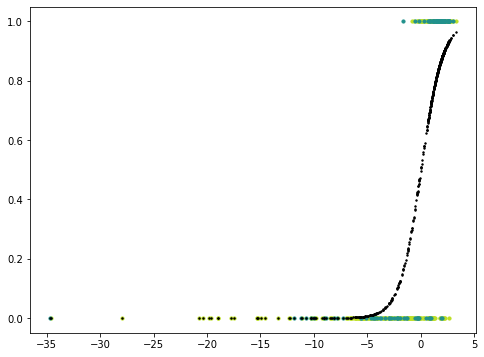

In [37]:
X_linear_train = logisticRegressor._linear_model(X_train)
X_linear_test = logisticRegressor._linear_model(X_test)
X_linear = logisticRegressor._linear_model(X)
y_sigmoid = logisticRegressor._sigmoid(X_linear)
cmap = plt.get_cmap("viridis")
plt.figure(figsize=(8,6))
m1 = plt.scatter(X_linear_train, y_train, color = cmap(0.9), s=10)
m2 = plt.scatter(X_linear_test, y_test, color = cmap(0.5), s=10)
plt.scatter(X_linear, y_sigmoid, color="black", s=2, label="Prediction")
plt.show()